# Assignment #2 - Data Gathering and Warehousing - DSSA-5102

Instructor: Melissa Laurino</br>
Spring 2024</br></br>
Name: Colin Glory</br>
Date: 1/25/24

Our next objective is to choose <b>ONE</b> of the datasets from our previous assignment to explore further. The datasets we have chose for Assignment #1 are managable to clean in R (Or Python if that is what you prefer to explore, see the technology check for working with Python in R in Jupyter notebook). Depending on your data, and especially the size of it, it may be more beneficial to clean in a language we are comfortable working in already instead of cleaning our data in SQL. SQL may be needed for cleaning of databases that are very large or hundreds of terabytes in size. We will clean our datasets first before we attempt to load them into our SQL databases. </br>
Not only is data everywhere, but it can also be messy. Messy data can originate in the data collection process, whether this is occurring with manual data entry and typos, or with outdated collection forms that hold multiple variables that mean the same thing. For example, while collecting data on marine mammals, it is important to note who the observer is. With Python and R, reading excel or csv files, these languages will take the same variable written as, "Melissa Laurino" and "melissa laurino" as two separate observers because they are case sensitive. However, this is not accurate because they are meant to be the same person within the observer column or category.</br>
Clean data is important for consistency that leads to accurate results and analysis. If we are using our data to make informed decisions in our field, we need it to be clean. We do not want to omit rows that may make a difference to our dataset because they do not fit a certain criteria due to typos, but how much should the original dataset be altered? Depending on your field, there may be regulations and compliance standards regarding data quality. Protocols may state if the data does not read exactly how it should be, then it should be ommitted. </br>
For our learning objectives in this class, we will clean our data. Our first assignment in our warehousing journey was important because it allowed us to gain a better understanding of a dataset that we personally did not collect. Now that we have that understanding, we can explore it in greater depth and clean it as necessary.<br>
<br>
It is important when cleaning data to: <br>
*Make detailed comments with your code* <br>
*Record EVERYTHING ommitted and changed if necessary* <br>
*Since we are exploring and learning without a specific organization policy, use your best judgement when ommitting records. If you have chosen to ommit data, please explain why.*</br>
<br>
<b>The code that I have written below is just to give you ideas on exploring and cleaning data. It is encouraged that you explore and clean it in greater detail than what I have written below for full credit.</b><br>
Additional examples: https://epirhandbook.com/en/cleaning-data-and-core-functions.html

<b>Dataset name: Data Science Salaries</b><br>
<b>Company/Government Organization:Kaggle</b><br>
Download link:https://www.kaggle.com/datasets/sazidthe1/data-science-salaries

Load necessary libraries:

In [1]:
#My example libraries are below, but edit as needed to fit your dataset:
#install.packages("tidyverse") Use install.packages() to install any necessary libraries.
library(tidyverse) #Reading data
library(lubridate) #Reading and manipulating dates and times
library(readr) #Reading the CSV data file

#Be sure to document each line of code like the above example.
#Documenting each line of code is helpful when revisiting assignments later in the semester.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Load data into R:

In [2]:
# setting up a dataframe tied to the csv
salaries <- read.csv("data_science_salaries.csv")

Exploration before cleaning:

In [4]:
#Display the structure of the dataset
str(salaries)

#Display a summary of the dataset
summary(salaries)

'data.frame':	11087 obs. of  11 variables:
 $ job_title         : chr  "Data Engineer" "Data Engineer" "Data Scientist" "Data Scientist" ...
 $ experience_level  : chr  "Mid-level" "Mid-level" "Senior-level" "Senior-level" ...
 $ employment_type   : chr  "Full-time" "Full-time" "Full-time" "Full-time" ...
 $ work_models       : chr  "Remote" "Remote" "Remote" "Remote" ...
 $ work_year         : int  2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 ...
 $ employee_residence: chr  "United States" "United States" "United States" "United States" ...
 $ salary            : int  148100 98700 140032 100022 120000 62100 250000 150000 219650 136000 ...
 $ salary_currency   : chr  "USD" "USD" "USD" "USD" ...
 $ salary_in_usd     : int  148100 98700 140032 100022 120000 62100 250000 150000 219650 136000 ...
 $ company_location  : chr  "United States" "United States" "United States" "United States" ...
 $ company_size      : chr  "Medium" "Medium" "Medium" "Medium" ...


  job_title         experience_level   employment_type    work_models       
 Length:11087       Length:11087       Length:11087       Length:11087      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
   work_year    employee_residence     salary         salary_currency   
 Min.   :2020   Length:11087       Min.   :   14000   Length:11087      
 1st Qu.:2023   Class :character   1st Qu.:  105000   Class :character  
 Median :2023   Mode  :character   Median :  142200   Mode  :character  
 Mean   :2023                      Mean   :  169572                     
 3rd Qu.:2023                      3rd Qu.:  188050                     
 Max.   :2024          

In [5]:
#Check for missing values
missing_values <- colSums(is.na(salaries))
print(missing_values)

         job_title   experience_level    employment_type        work_models 
                 0                  0                  0                  0 
         work_year employee_residence             salary    salary_currency 
                 0                  0                  0                  0 
     salary_in_usd   company_location       company_size 
                 0                  0                  0 


What columns are missing values (If any)? Do you think you should remove the rows of data at this time in the exploration? Why or why not?

If you chose to remove rows with specific missing values:

In [6]:
#Remove rows with missing values...? It is imporant to specify the columns here and explain your thought process.
salaries <- na.omit(salaries)

What about duplicates?

In [7]:
#Do we have any duplicates?
duplicate_rows <- salaries[duplicated(salaries) | duplicated(salaries, fromLast = TRUE), ]

#Print duplicates:
print("Duplicate Rows:")
print(duplicate_rows)

[1] "Duplicate Rows:"
                            job_title experience_level employment_type
5                        BI Developer        Mid-level       Full-time
6                        BI Developer        Mid-level       Full-time
9                       Data Engineer  Executive-level       Full-time
10                      Data Engineer  Executive-level       Full-time
11    Business Intelligence Developer        Mid-level       Full-time
12    Business Intelligence Developer        Mid-level       Full-time
19                     Data Scientist        Mid-level       Full-time
20                     Data Scientist        Mid-level       Full-time
23                     Data Scientist        Mid-level       Full-time
24                     Data Scientist        Mid-level       Full-time
43                  Applied Scientist        Mid-level       Full-time
44                  Applied Scientist        Mid-level       Full-time
81          Machine Learning Engineer     Senior-level 

In [8]:
#Remove duplicates...? It is imporant to specify the columns here and explain your thought process.
# So my thought process here is to not delete the duplicates. There are no column identifiers that distinguish a person from another.
# There are no columns that refer to a name or ID. Each employee can have the same job title, experience, employment type, and pay.
# My final verdict is to leave the data alone.
# Another thing that I can do for future assignments with this dataset is to create a ID for each row.
salaries <- distinct(salaries)

Let's revisit the structure and look at the data types for each column. This will be important for SQL.

In [9]:
#What are the data types for each column?
print("Original Data Types:")
print(sapply(salaries, class))

[1] "Original Data Types:"
         job_title   experience_level    employment_type        work_models 
       "character"        "character"        "character"        "character" 
         work_year employee_residence             salary    salary_currency 
         "integer"        "character"          "integer"        "character" 
     salary_in_usd   company_location       company_size 
         "integer"        "character"        "character" 


In [ ]:
#Convert data types if needed. This is VERY common for dates and times. Library(lubridate) works well with dates.
#Example: #Convert column to an integer type

# My column data types are in the correct type, so I have no need to change any.
#data$column <- as.integer(data$column)
#OR?
#data$column <- as.new_data_type(data$column)

#What are the updated column types?
print("Updated Data Types:")
print(sapply(data, class))

Changing text characters in your data. Make all column names lowercase. Lowercase is easier to read in SQL when we get to that point.

In [3]:
#Make all column names lowercase:
colnames(salaries) <- tolower(colnames(salaries))

#Example for data within columns:
colnames(salaries) <- tolower(colnames(salaries))

Assignment #1 asked you to create a graph and check for outliers. Are there any outliers in your columns? How can we check for outliers?

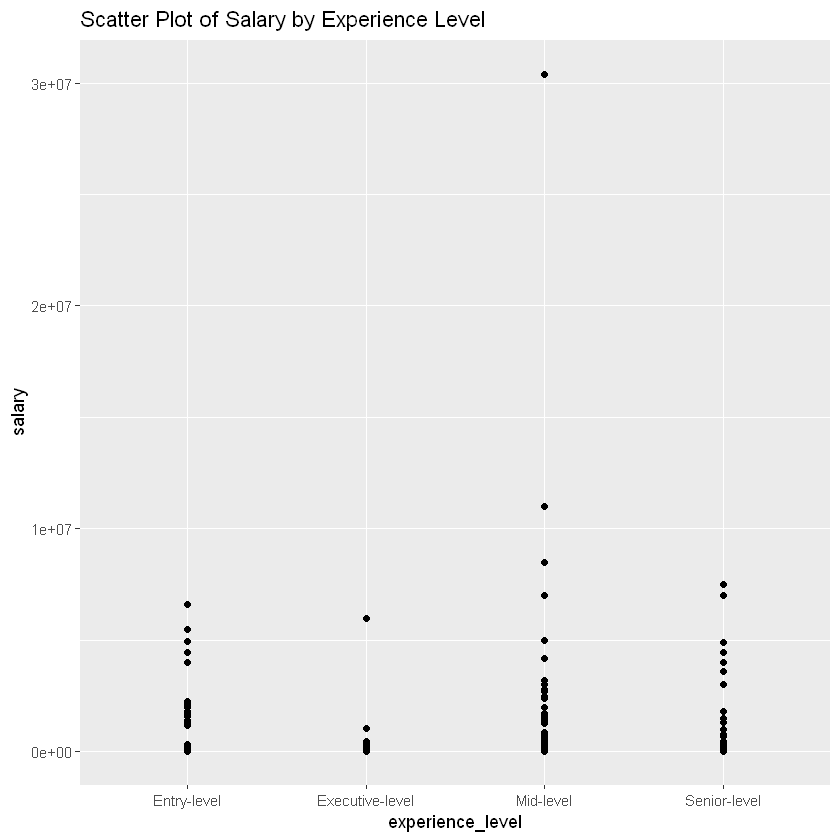

In [20]:
#Create a code to check for outliers that fits your data exploration needs or any other errors in numeric entries.

ggplot(salaries, aes(x = experience_level, y = salary)) +
  geom_point() +
  ggtitle("Scatter Plot of Salary by Experience Level")


<b>To create additional steps for data cleaning in Jupyter notebook: </b><br>
Hit the plus button in the top left corner to add a row of code. <br>
To change from code to text or headers, select from the drop down menu above. <br>
Use "< b r >" (No spaces or quotes) to skip a line in markdown and other HTML text font options.

Additional step #1:

Additional step #2:

Additional step #3:

Lets save our new CLEAN data :) 

In [5]:
#Save the newly cleaned dataset as a NEW file:
write.csv(salaries, 'cleaned_data.csv')